In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# partial derivatives
a = 2.0
b = -4.0
c = 12 
d = a*b + c
print(d)

4.0


In [15]:
h = 0.000001

a = 2.0
b = -4.0
c = 12 
d1 = a*b + c
a += h # partial dervitives w.r.t to a
d2 = a*b + c
print(d1, d2)
print("slope", (d2-d1)/h)

d1 = a*b + c
b += h # partial dervitives w.r.t to b
d2 = a*b + c
print(d1, d2)
print("slope", (d2-d1)/h)

d1 = a*b + c
c += h # partial dervitives w.r.t to b
d2 = a*b + c
print(d1, d2)
print("slope", (d2-d1)/h)

4.0 3.9999959999999994
slope -4.000000000559112
3.9999959999999994 3.999998000001
slope 2.0000010003684565
3.999998000001 3.999999000000999
slope 0.9999999992515995


In [41]:
# neural network will contain some large expressions so let's have class(data structures) that will handles values
class Value:

    def __init__(self, data, _children=(), _op="", label=''):
        self.data = data # initializing the values
        self.gradient = 0.0 # it's basically the partial derative of the output w.r.t this value initially it would be zero
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"value(data={self.data})" #simple interpolation to print the object in nicer way
 
    def __add__(self, other): # Addition overloading
        answer = Value(self.data + other.data, (self, other), "+")
        return answer

    def __mul__(self, other): # Multiplication overloading
        answer = Value(self.data * other.data, (self, other), "*")
        return answer

    def tanh(self):
        x = self.data
        tan_output = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        answer = Value(tan_output, (self, ), 'tanh') # the self is an children object 
        return answer


a = Value(2, label="a")
b = Value(-4.0, label="b")
c = Value(12, label="c")
e = a*b; e.label = "e"
d = e + c
d.label = "d"
d.label
f = Value(-7, label="f")
Output = d * f; Output.label = "Output"

In [17]:
d._prev
d._op

'+'

In [23]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes: #just to avoid the infinite loop
            nodes.add(v)
            for child in v._prev: #sort of depth first search just to make tuples of all the edges to show connection
                edges.add((child, v))
                build(child) 
    build(root)
    return nodes, edges

def draw_dot(root): # responsible for actual graphics
    dot = Digraph(format="svg", graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f, gradient %.4f}" % (n.label, n.data, n.gradient), shape='record')
        if n._op:
            dot.node(name=uid + n._op,label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)

    return dot

                

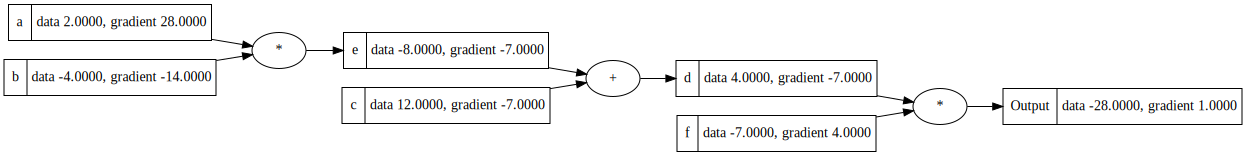

In [24]:
Output.gradient = 1
draw_dot(Output) #Forward Pass in neural network

#Now lets find the partial derivative of Output w.r.t d
dOutput/dd = ((d+h)*(f) - d*f)/h #By ab-initio
or dOutput/dd = (df + fh - df)/h = (fh)/h = f
the same can be said for f which will be equal to d
so we can say that

In [20]:
d.gradient = -7  #(dout/df)# or f.data Cant equate to f cause the constructor expects an int not a value
f.gradient = 4 #(dout/dd)


Now let's find out Douput/dc
as we know Doutput/dd and we can find dd/dc so Doutput/dc can be written as = dd/dc * douput/dd 
dd will cross out so finding Douput/dc is basically dd/dc * douput/dd
dd/dc will be 1.0 can be computed manually

In [21]:
c.gradient = d.gradient * 1
# the same can be proved for e
e.gradient = d.gradient * 1

Now let's calculate dout/da
dout/da = dout/dd * dd/de * de/da #as (dout/dd * dd/de) is e.gradient and de/da = b as we did for d

In [22]:
a.gradient = e.gradient * b.data
b.gradient = e.gradient * a.data

now if we want to increase the output we can + the gradient value in the ogrinal value or - if it the output represent the loss function

In [26]:
a.data += 0.01 * a.gradient #some small step in the direction of gradient which is called learning rate
b.data += 0.01 * b.gradient
c.data += 0.01 * c.gradient
f.data += 0.01 * f.gradient #only the leaf nodes

e = a*b
d = e + c
Output = d * f
print(Output)

value(data=-17.335968)


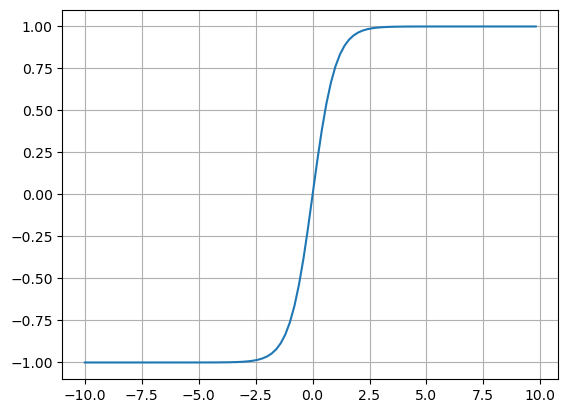

In [32]:
plt.plot(np.arange(-10,10,0.2), np.tanh(np.arange(-10,10,0.2))); plt.grid();

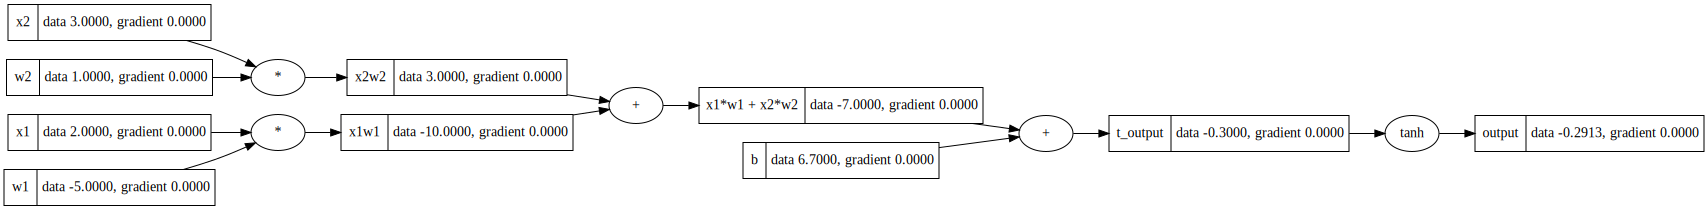

In [45]:
# inputs of single neuron
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')
#Synaptic strength or weights
w1 = Value(-5.0, label='w1')
w2 = Value(1.0, label='w2')
#bias
b = Value(6.7, label='b')
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
t_output = x1w1x2w2 + b; t_output.label = 't_output' #without activation function
output = t_output.tanh(); output.label='output'
draw_dot(output)



In [46]:
output.gradient = 1.0 #as it is an output

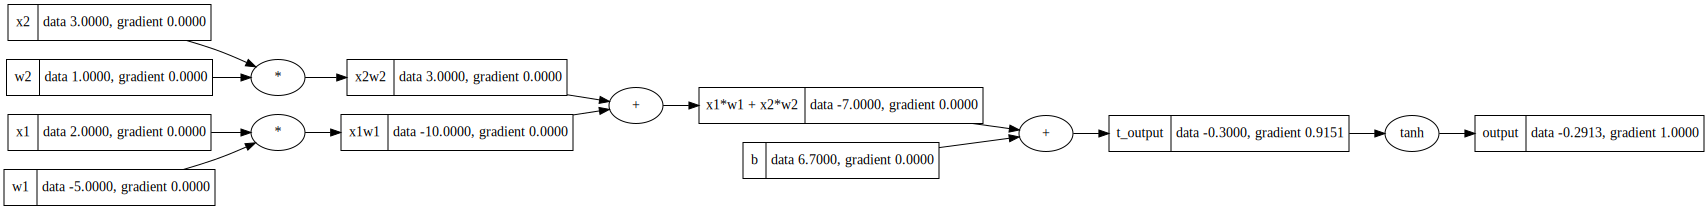

In [50]:
draw_dot(output)

Now we have to find the gradient. for that we have to find doutput/dt_output = dtanh(t_output)/dt_output
as the derivative of tanh = 1-tanh**2
so the derivative would be


In [48]:
1-output.data**2

0.9151369618266293

In [49]:
t_output.gradient=0.9151369618266293

In [51]:
x1w1x2w2.gradient = 0.9151369618266293

In [52]:
b.gradient = 0.9151369618266293

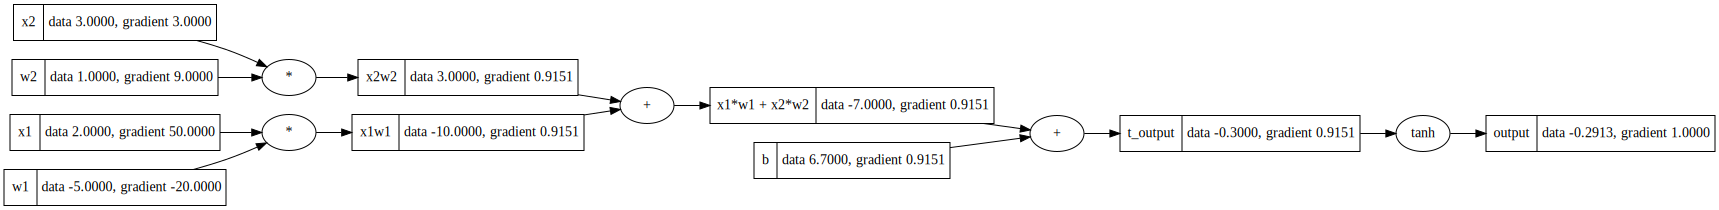

In [58]:
draw_dot(output)

In [54]:
x1w1.gradient = 0.9151369618266293

In [55]:
x2w2.gradient = 0.9151369618266293

w2.gradient = dx2w2/dw2
x2.gradient = dx2w2/dx2

In [57]:
x2.gradient = w2.data * x2w2.data
w2.gradient = x2.data * x2w2.data
#in the same way
x1.gradient = w1.data * x1w1.data
w1.gradient = x1.data * x1w1.data

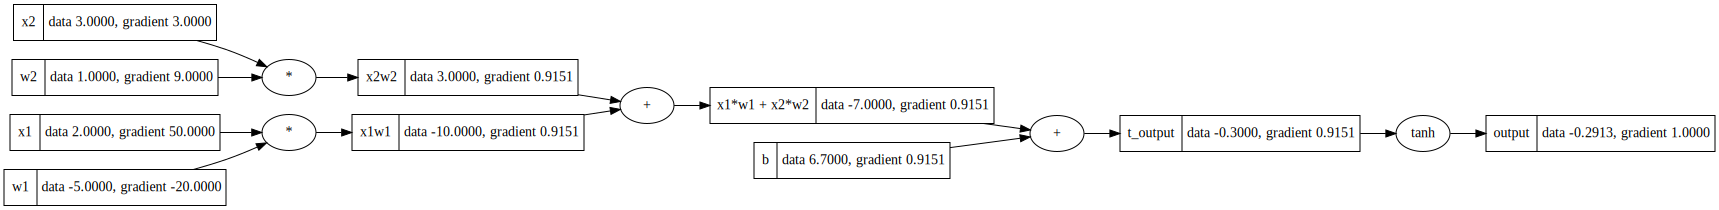

In [59]:
draw_dot(output)

In [83]:
# Now let's automate the process 
class Value:

    def __init__(self, data, _children=(), _op="", label=''):
        self.data = data # initializing the values
        self.gradient = 0.0 # it's basically the partial derative of the output w.r.t this value initially it would be zero
        self._backward = lambda: None #its doesnt return anything it will be set later
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"value(data={self.data})" #simple interpolation to print the object in nicer way
 
    def __add__(self, other): # Addition overloading
        answer = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.gradient = 1.0 * answer.gradient
            other.gradient = 1.0 * answer.gradient
        answer._backward = _backward #only define it not execute it immediatley execute only when out._backward is called that is why it is without ()
        return answer

    def __mul__(self, other): # Multiplication overloading
        answer = Value(self.data * other.data, (self, other), "*")
        def _backward():
            self.gradient = other.data * answer.gradient
            other.gradient = self.data * answer.gradient
        answer._backward = _backward  
        return answer

    def tanh(self):
        x = self.data
        tan_output = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        answer = Value(tan_output, (self, ), 'tanh') # the self is an children object
        def _backward():
            # Local Derivative: Calculating how sensitive tanh's output is to its input.
            # This tells us how a small change in input ('x') changes the tanh output.
            local_derivative = 1 - tan_output**2

            # Multiply with the Output Gradient: 
            # This step integrates the local sensitivity with the network's overall sensitivity.
            # It measures how a change in this neuron's output affects the final output.
            self.gradient = local_derivative * answer.gradient
        answer._backward = _backward
        # Return the result of the tanh operation
        return answer


a = Value(2, label="a")
b = Value(-4.0, label="b")
c = Value(12, label="c")
e = a*b; e.label = "e"
d = e + c
d.label = "d"
d.label
f = Value(-7, label="f")
Output = d * f; Output.label = "Output"

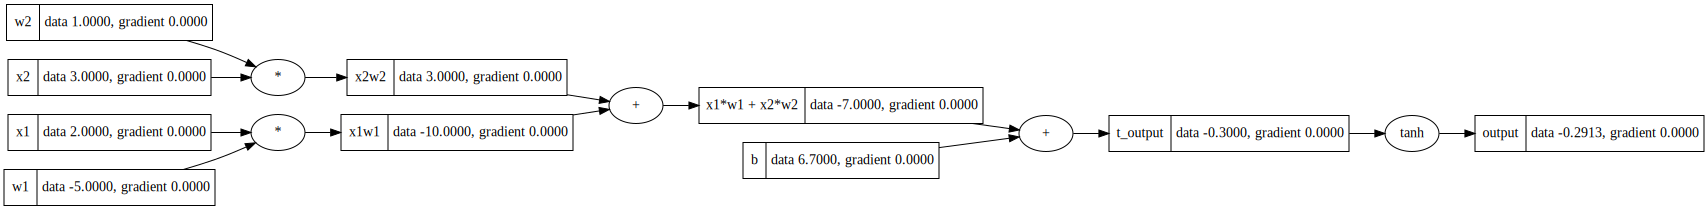

In [101]:
# inputs of single neuron
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')
#Synaptic strength or weights
w1 = Value(-5.0, label='w1')
w2 = Value(1.0, label='w2')
#bias
b = Value(6.7, label='b')
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
t_output = x1w1x2w2 + b; t_output.label = 't_output' #without activation function
output = t_output.tanh(); output.label='output'
draw_dot(output)

In [85]:
output.gradient = 1.0 #casue initially it is zero
output._backward()

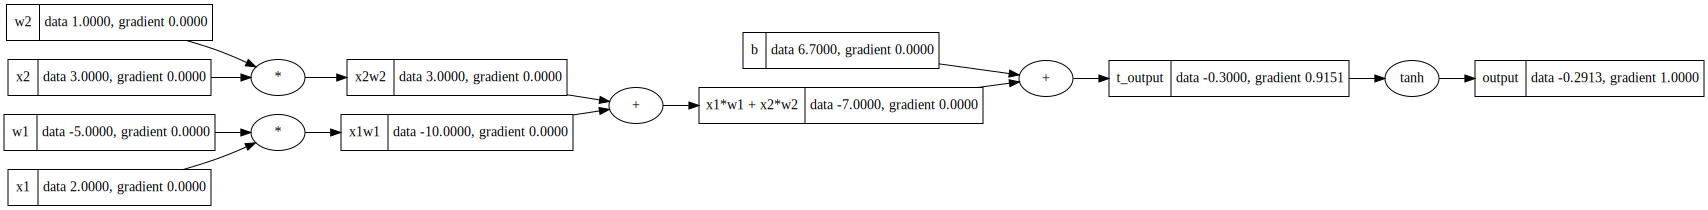

In [86]:
draw_dot(output)

In [87]:
t_output._backward()

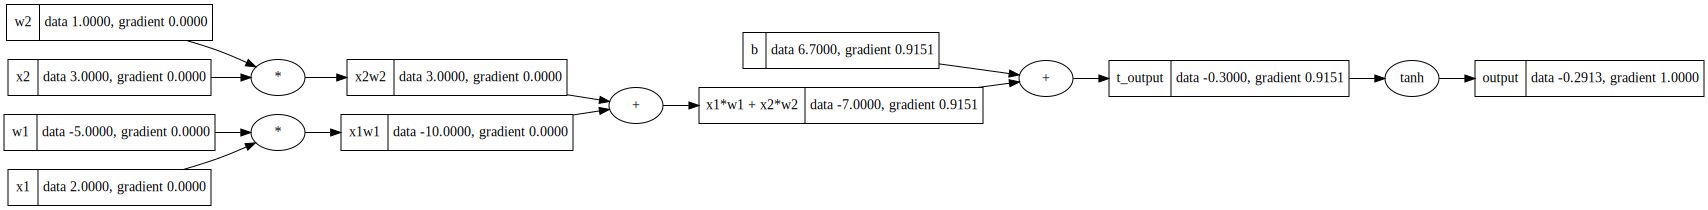

In [88]:
draw_dot(output)

In [89]:
b._backward()

In [90]:
output.gradient = 1.0 #casue initially it is zero


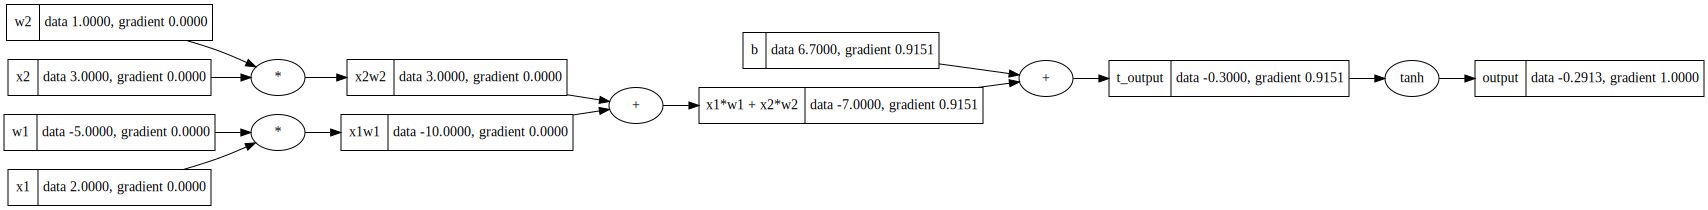

In [91]:
draw_dot(output)

In [92]:
x1w1x2w2._backward()

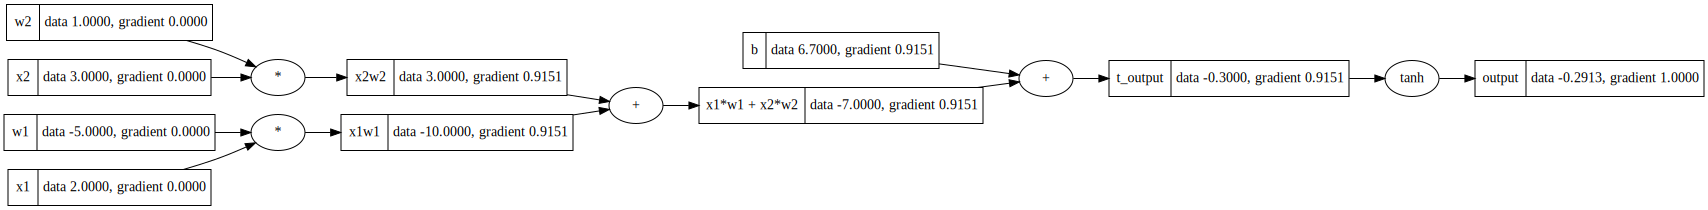

In [93]:
draw_dot(output)

In [94]:
x2w2._backward()

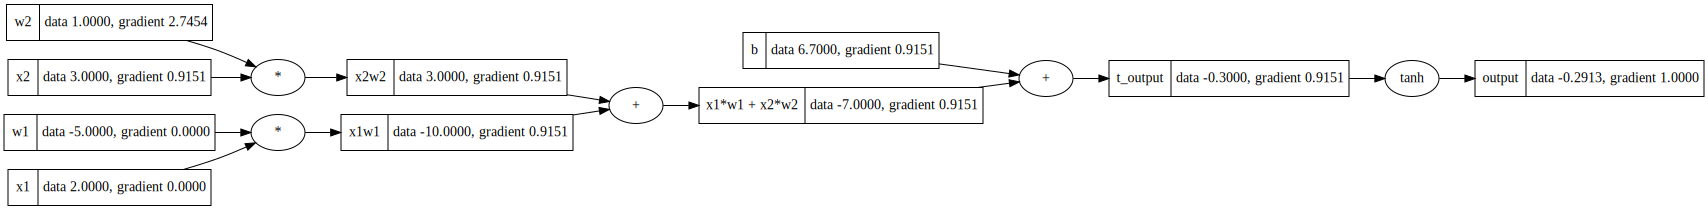

In [95]:
draw_dot(output)

In [96]:
x1w1._backward()

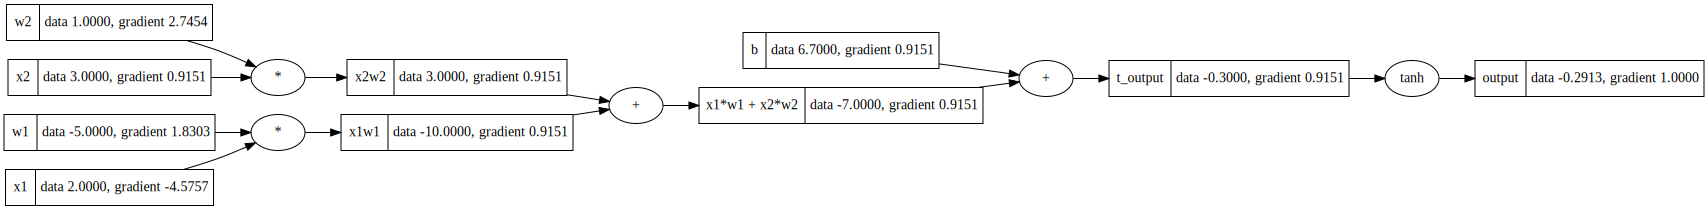

In [97]:
draw_dot(output)

In [108]:
# now lets automate it we will use topological sort to achieve the order from output to input
# A topological sort is an algorithm used on Directed Acyclic Graphs, also known as DAGs. 
#It arranges the vertices in a specific sequence. For every directed edge that goes from one vertex, 
# which we can call u, to another vertex named v, the vertex u will appear before vertex v in that sequence.
# Reversing the the above will solve our problem
output.gradient = 1 #or u will get allzeros
t_order = []
visited = set()
def build_t_order(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_t_order(child)
        t_order.append(v) #all child visited
build_t_order(output)
t_order
for node in reversed(t_order):
    node._backward()

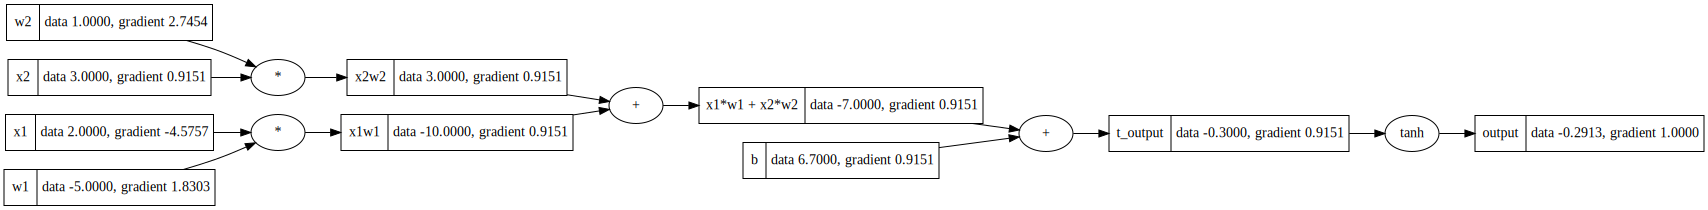

In [109]:

draw_dot(output)

In [114]:
class Value:

    def __init__(self, data, _children=(), _op="", label=''):
        self.data = data # initializing the values
        self.gradient = 0.0 # it's basically the partial derative of the output w.r.t this value initially it would be zero
        self._backward = lambda: None #its doesnt return anything it will be set later
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"value(data={self.data})" #simple interpolation to print the object in nicer way
 
    def __add__(self, other): # Addition overloading
        answer = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.gradient += 1.0 * answer.gradient
            other.gradient += 1.0 * answer.gradient
        answer._backward = _backward #only define it not execute it immediatley execute only when out._backward is called that is why it is without ()
        return answer

    def __mul__(self, other): # Multiplication overloading
        answer = Value(self.data * other.data, (self, other), "*")
        def _backward():
            self.gradient += other.data * answer.gradient
            other.gradient += self.data * answer.gradient
        answer._backward = _backward  
        return answer

    def tanh(self):
        x = self.data
        tan_output = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        answer = Value(tan_output, (self, ), 'tanh') # the self is an children object
        def _backward():
            # Local Derivative: Calculating how sensitive tanh's output is to its input.
            # This tells us how a small change in input ('x') changes the tanh output.
            local_derivative = 1 - tan_output**2

            # Multiply with the Output Gradient: 
            # This step integrates the local sensitivity with the network's overall sensitivity.
            # It measures how a change in this neuron's output affects the final output.
            self.gradient += local_derivative * answer.gradient
        answer._backward = _backward
        # Return the result of the tanh operation
        return answer

    def backward(self):
        self.gradient = 1 #or u will get allzeros for childrens or prev
        t_order = []
        visited = set()
        def build_t_order(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_t_order(child)
                t_order.append(v) #all child visited
        build_t_order(self)
        for node in reversed(t_order):
            node._backward()

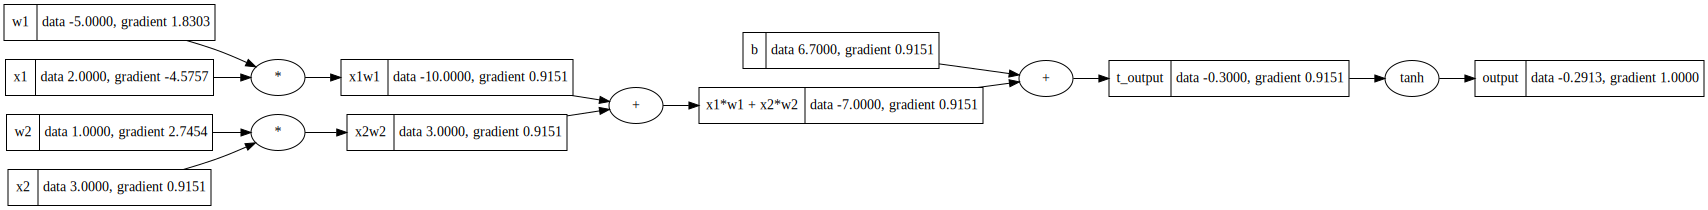

In [117]:
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')
#Synaptic strength or weights
w1 = Value(-5.0, label='w1')
w2 = Value(1.0, label='w2')
#bias
b = Value(6.7, label='b')
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
t_output = x1w1x2w2 + b; t_output.label = 't_output' #without activation function
output = t_output.tanh(); output.label='output'
output.backward()
draw_dot(output)

In [141]:
class Value:

    def __init__(self, data, _children=(), _op="", label=''):
        self.data = data # initializing the values
        self.gradient = 0.0 # it's basically the partial derative of the output w.r.t this value initially it would be zero
        self._backward = lambda: None #its doesnt return anything it will be set later
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"value(data={self.data})" #simple interpolation to print the object in nicer way
 
    def __add__(self, other): # Addition overloading
        other = other if isinstance(other, Value) else Value(other) #to make its addition easy with primitive types
        answer = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.gradient += 1.0 * answer.gradient
            other.gradient += 1.0 * answer.gradient
        answer._backward = _backward #only define it not execute it immediatley execute only when out._backward is called that is why it is without ()
        return answer

    def __mul__(self, other): # Multiplication overloading
        other = other if isinstance(other, Value) else Value(other) #to make its multiplication easy with primitive types
        answer = Value(self.data * other.data, (self, other), "*")
        def _backward():
            self.gradient += other.data * answer.gradient
            other.gradient += self.data * answer.gradient
        answer._backward = _backward  
        return answer

    def __radd__(self, other):
        return self + other

    def __rmul__(self, other): #to make * easy of primitive*value it will be called by other*self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')
    
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
    
        return out

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __truediv__(self, other):
        return self * other**-1 #for this we pow function

    def tanh(self):
        x = self.data
        tan_output = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        answer = Value(tan_output, (self, ), 'tanh') # the self is an children object
        def _backward():
            # Local Derivative: Calculating how sensitive tanh's output is to its input.
            # This tells us how a small change in input ('x') changes the tanh output.
            local_derivative = 1 - tan_output**2

            # Multiply with the Output Gradient: 
            # This step integrates the local sensitivity with the network's overall sensitivity.
            # It measures how a change in this neuron's output affects the final output.
            self.gradient += local_derivative * answer.gradient
        answer._backward = _backward
        # Return the result of the tanh operation
        return answer

    def backward(self):
        self.gradient = 1 #or u will get allzeros for childrens or prev
        t_order = []
        visited = set()
        def build_t_order(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_t_order(child)
                t_order.append(v) #all child visited
        build_t_order(self)
        for node in reversed(t_order):
            node._backward()

    def exp(self):
        x=self.data
        answer = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.gradient += answer.data * answer.gradient
        answer._backward = _backward
        return answer

In [142]:
a = Value(6.0)
b = Value(3.0)
a-b

value(data=3.0)

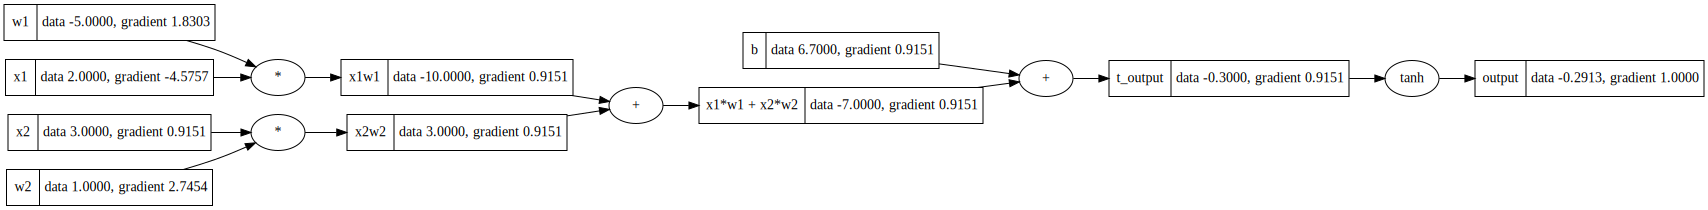

In [143]:
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')
#Synaptic strength or weights
w1 = Value(-5.0, label='w1')
w2 = Value(1.0, label='w2')
#bias
b = Value(6.7, label='b')
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
t_output = x1w1x2w2 + b; t_output.label = 't_output' #without activation function
output = t_output.tanh(); output.label='output'
output.backward()
draw_dot(output)

In [149]:
class Value:

    def __init__(self, data, _children=(), _op="", label=''):
        self.data = data # initializing the values
        self.gradient = 0.0 # it's basically the partial derative of the output w.r.t this value initially it would be zero
        self._backward = lambda: None #its doesnt return anything it will be set later
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"value(data={self.data})" #simple interpolation to print the object in nicer way
 
    def __add__(self, other): # Addition overloading
        other = other if isinstance(other, Value) else Value(other) #to make its addition easy with primitive types
        answer = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.gradient += 1.0 * answer.gradient
            other.gradient += 1.0 * answer.gradient
        answer._backward = _backward #only define it not execute it immediatley execute only when out._backward is called that is why it is without ()
        return answer

    def __mul__(self, other): # Multiplication overloading
        other = other if isinstance(other, Value) else Value(other) #to make its multiplication easy with primitive types
        answer = Value(self.data * other.data, (self, other), "*")
        def _backward():
            self.gradient += other.data * answer.gradient
            other.gradient += self.data * answer.gradient
        answer._backward = _backward  
        return answer

    def __radd__(self, other):
        return self + other

    def __rmul__(self, other): #to make * easy of primitive*value it will be called by other*self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')
    
        def _backward():
            self.gradient += other * (self.data ** (other - 1)) * out.gradient
        out._backward = _backward
    
        return out

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __truediv__(self, other):
        return self * other**-1 #for this we pow function

    def tanh(self):
        x = self.data
        tan_output = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        answer = Value(tan_output, (self, ), 'tanh') # the self is an children object
        def _backward():
            # Local Derivative: Calculating how sensitive tanh's output is to its input.
            # This tells us how a small change in input ('x') changes the tanh output.
            local_derivative = 1 - tan_output**2

            # Multiply with the Output Gradient: 
            # This step integrates the local sensitivity with the network's overall sensitivity.
            # It measures how a change in this neuron's output affects the final output.
            self.gradient += local_derivative * answer.gradient
        answer._backward = _backward
        # Return the result of the tanh operation
        return answer

    def backward(self):
        self.gradient = 1 #or u will get allzeros for childrens or prev
        t_order = []
        visited = set()
        def build_t_order(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_t_order(child)
                t_order.append(v) #all child visited
        build_t_order(self)
        for node in reversed(t_order):
            node._backward()

    def exp(self):
        x=self.data
        answer = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.gradient += answer.data * answer.gradient
        answer._backward = _backward
        return answer

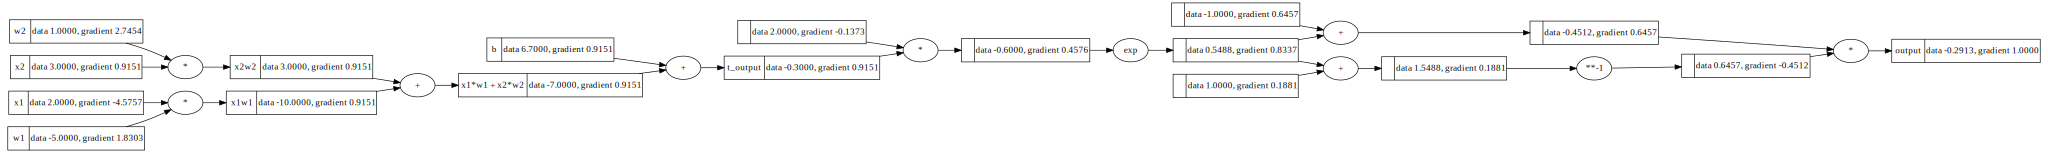

In [150]:
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')
#Synaptic strength or weights
w1 = Value(-5.0, label='w1')
w2 = Value(1.0, label='w2')
#bias
b = Value(6.7, label='b')
x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
t_output = x1w1x2w2 + b; t_output.label = 't_output' #without activation function
e_state = (2*t_output).exp()
output = (e_state-1)/(e_state+1); output.label='output'
output.backward()
draw_dot(output)